# Gradinet Boosting Regression on MCR & MT Data

28 - 03 - 2023 | MAE = 11.18

In [35]:
#from google.colab import drive
#drive.mount('/content/drive')

In [36]:
#file = r'/content/drive/MyDrive/Colab/xgb-mcr/dataset.csv'

Data

In [37]:
import pandas as pd
import numpy as np
file = r'dataset-mcr-rt-180000.csv'
df  = pd.read_csv(file)
dataset = df.values
print('Total number of rows:', df.shape[0]) #940520
X = dataset[:, 6] # mt column
print(np.min(X)," ",np.max(X))
Y = dataset[:, 5] # mcr column
print(np.min(Y)," ",np.max(Y))

Total number of rows: 179996
0.01   5858.833333333333
0.0253444780071999   4874.2


Scatter

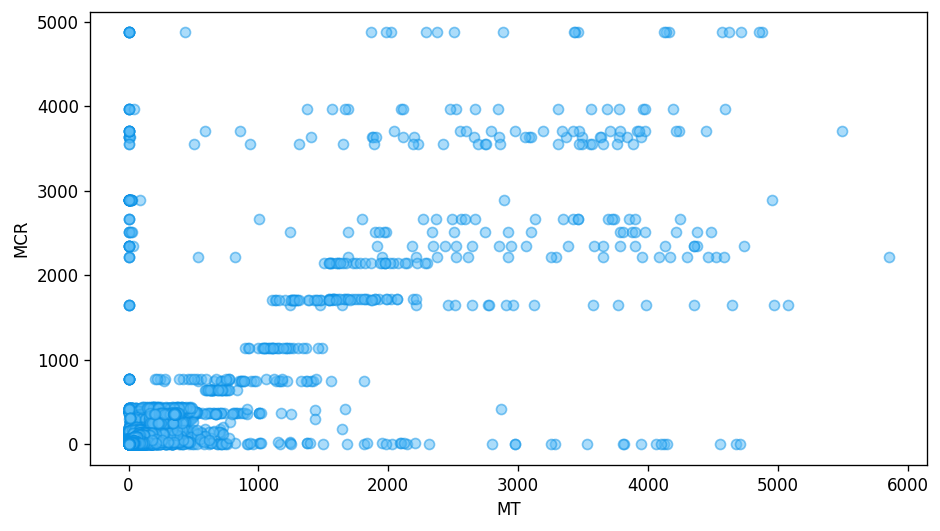

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 5), dpi=120)
plt.scatter(x=X, y=Y, color="#59bbf7", marker="o",alpha=0.5, edgecolors="#0991e6")
plt.ylabel('MCR', fontsize=10)
plt.xlabel('MT', fontsize=10)
plt.show()

Reshape + Split

In [39]:
X = X.reshape(-1, 1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

Model

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from numpy import mean

# model
gbr = GradientBoostingRegressor(subsample=0.8, learning_rate=0.02, n_estimators=300, max_depth=5, min_samples_split=200, min_samples_leaf=40)

# model evaluation
# The results of this grid search have been used in the gbr model.
'''
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [100, 200, 300],
    'min_samples_leaf': [20, 40, 60]
}

grid_search = GridSearchCV(gbr, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, Y_train)
print(grid.best_params_)
'''

# fit
gbr.fit(X_train, Y_train)

# prediction
Y_predict = gbr.predict(X_test)


Prediction chart


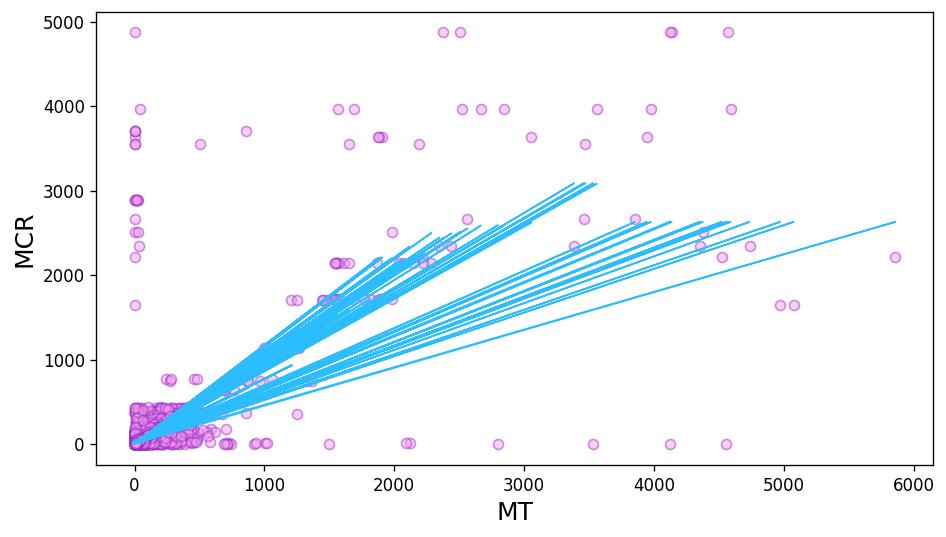

In [41]:

# plot (before preprocessing)
plt.figure(figsize=(9, 5), dpi=120)
plt.scatter(x=X_test, y=Y_test, color="#F3A0F2", marker="o",alpha=0.5, edgecolors="#9D2EC5")
plt.plot(X_test, Y_predict, color="#2CBDFE", linewidth=1)
plt.ylabel('MCR', fontsize=15)
plt.xlabel('MT', fontsize=15)
plt.show()
# r2 score
##print(gbr.score(X_train, Y_train))
##print(gbr.score(X_test, Y_test))

Errors

In [42]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
mae = mean_absolute_error(Y_test, Y_predict)
mape = mean_absolute_percentage_error(Y_test, Y_predict)
print("MAPE : ", mape)
print("MAE : ", mae)

MAPE :  15.365650439246766
MAE :  11.22862580016896


Graph

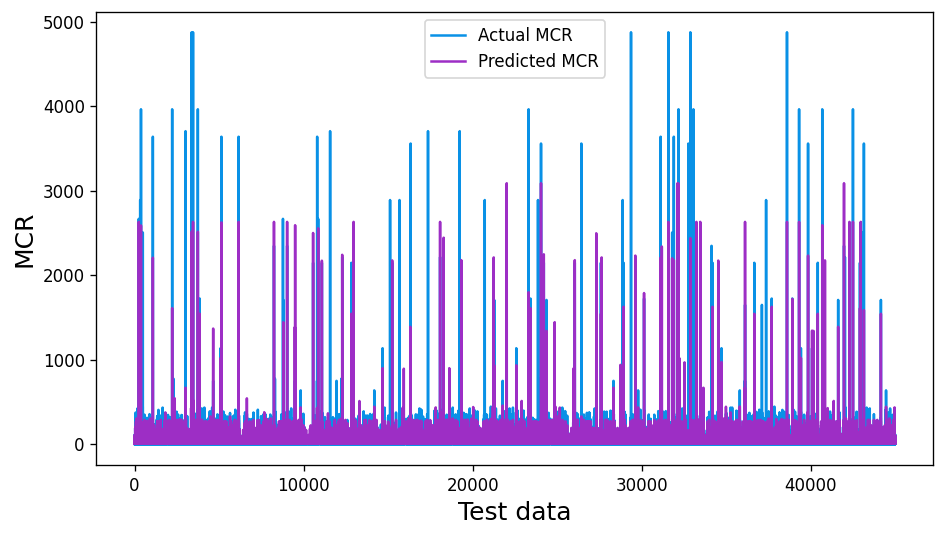

In [43]:
plt.figure(figsize=(9, 5), dpi=120)
plt.plot(Y_test, label='Actual MCR', color="#0991e6")
plt.plot(Y_predict, label='Predicted MCR', color="#9D2EC5")
plt.ylabel('MCR', fontsize=15)
plt.xlabel('Test data', fontsize=15)
plt.legend()
plt.show()